# Imports and Reading Data

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('max_columns', 200)

import math
import datetime

# Raw Solar Data of Cities from PVGIS
## Cities include: Brussels, Paris, London, Madrid

In [34]:
brussels_df = pd.read_csv(r'C:\Users\Redd\Documents\Python Training\Portfolio\2. Solar heating\Brussels Monthly Data.csv', 
                delimiter=',',
                lineterminator='\r',
                skiprows=(0,1,2,3,4))

In [35]:
brussels_df.columns

Index(['\nyear', 'Unnamed: 1', 'month', 'Unnamed: 3', 'H(h)_m', 'Unnamed: 5',
       'H(i_opt)_m', 'Unnamed: 7', 'Hb(n)_m', 'Unnamed: 9', 'Kd',
       'Unnamed: 11', 'T2m'],
      dtype='object')

In [36]:
brussels_df = brussels_df[['\nyear',
#                          'Unnamed: 1', 
                          'month',
#                          'Unnamed: 3', 
                          'H(h)_m',
#                          'Unnamed: 5',
                          'H(i_opt)_m',
#                          'Unnamed: 7', 
                          'Hb(n)_m',
#                          'Unnamed: 9', 
                          'Kd',
#                          'Unnamed: 11',
                          'T2m']].copy()
brussels_df.head()

,\nyear,month,H(h)_m,H(i_opt)_m,Hb(n)_m,Kd,T2m
0,\n2018,Jan,21.36,34.69,24.66,0.74,5.9
1,\n2018,Feb,59.94,109.66,105.69,0.39,0.5
2,\n2018,Mar,74.49,94.59,65.54,0.60,5.4
3,\n2018,Apr,124.62,141.56,112.51,0.50,12.4
4,\n2018,May,185.03,193.16,177.37,0.39,16.0


In [37]:
brussels_df = brussels_df.rename(columns = {'\nyear' : 'year',
                                            'month' : 'month',
                                            'H(h)_m' : 'global_horizontal_irradiation',
                                            'H(i_opt)_m' : 'global_irradiation_optimum_angle',
                                            'Hb(n)_m' : 'direct_normal_irradiation',
                                            'Kd' : 'diffuse_global_ratio',
                                            'T2m' : 'outdoor_temperature'
                                           }
                                )
brussels_df.head()

,year,month,global_horizontal_irradiation,global_irradiation_optimum_angle,direct_normal_irradiation,diffuse_global_ratio,outdoor_temperature
0,\n2018,Jan,21.36,34.69,24.66,0.74,5.9
1,\n2018,Feb,59.94,109.66,105.69,0.39,0.5
2,\n2018,Mar,74.49,94.59,65.54,0.60,5.4
3,\n2018,Apr,124.62,141.56,112.51,0.50,12.4
4,\n2018,May,185.03,193.16,177.37,0.39,16.0


In [38]:
brussels_df['year'] = brussels_df['year'].str.replace('\n', '', regex=False)
brussels_df = brussels_df[:36]
brussels_df

,year,month,global_horizontal_irradiation,global_irradiation_optimum_angle,direct_normal_irradiation,diffuse_global_ratio,outdoor_temperature
0,2018,Jan,21.36,34.69,24.66,0.74,5.9
1,2018,Feb,59.94,109.66,105.69,0.39,0.5
2,2018,Mar,74.49,94.59,65.54,0.60,5.4
3,2018,Apr,124.62,141.56,112.51,0.50,12.4
4,2018,May,185.03,193.16,177.37,0.39,16.0
5,2018,Jun,164.35,158.17,126.23,0.51,17.9
6,2018,Jul,197.61,197.04,182.21,0.41,21.8
7,2018,Aug,145.24,154.85,123.14,0.50,19.3
8,2018,Sep,108.98,139.77,113.43,0.50,15.2
9,2018,Oct,74.70,118.61,100.83,0.46,12.7


In [39]:
brussels_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   year                              36 non-null     object 
 1   month                             36 non-null     object 
 2   global_horizontal_irradiation     36 non-null     float64
 3   global_irradiation_optimum_angle  36 non-null     float64
 4   direct_normal_irradiation         36 non-null     float64
 5   diffuse_global_ratio              36 non-null     float64
 6   outdoor_temperature               36 non-null     float64
dtypes: float64(5), object(2)
memory usage: 2.1+ KB


In [40]:
def month_converter(month):
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    return months.index(month) + 1

In [41]:
brussels_df['month'] = brussels_df['month'].apply(month_converter)

In [42]:
brussels_df['year'] = pd.to_numeric(brussels_df['year'])

In [43]:
brussels_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   year                              36 non-null     int64  
 1   month                             36 non-null     int64  
 2   global_horizontal_irradiation     36 non-null     float64
 3   global_irradiation_optimum_angle  36 non-null     float64
 4   direct_normal_irradiation         36 non-null     float64
 5   diffuse_global_ratio              36 non-null     float64
 6   outdoor_temperature               36 non-null     float64
dtypes: float64(5), int64(2)
memory usage: 2.1 KB


In [44]:
brussels_df['date'] = pd.to_datetime(brussels_df[['year', 'month']].assign(day=1)).dt.date
brussels_df.head()


,year,month,global_horizontal_irradiation,global_irradiation_optimum_angle,direct_normal_irradiation,diffuse_global_ratio,outdoor_temperature,date
0,2018,1,21.36,34.69,24.66,0.74,5.9,2018-01-01
1,2018,2,59.94,109.66,105.69,0.39,0.5,2018-02-01
2,2018,3,74.49,94.59,65.54,0.60,5.4,2018-03-01
3,2018,4,124.62,141.56,112.51,0.50,12.4,2018-04-01
4,2018,5,185.03,193.16,177.37,0.39,16.0,2018-05-01


In [45]:
diff = brussels_df['date'].diff(periods=-1).dt.days.abs()
diff[35] = 31               #initially NaN for the last month value, place 31 for december

brussels_df['calendar_days'] = diff
brussels_df.tail()


,year,month,global_horizontal_irradiation,global_irradiation_optimum_angle,direct_normal_irradiation,diffuse_global_ratio,outdoor_temperature,date,calendar_days
31,2020,8,138.90,147.80,108.20,0.53,20.8,2020-08-01,31.0
32,2020,9,109.29,141.70,121.13,0.44,16.6,2020-09-01,30.0
33,2020,10,49.10,63.66,36.41,0.73,11.7,2020-10-01,31.0
34,2020,11,33.30,63.14,53.65,0.56,8.9,2020-11-01,30.0
35,2020,12,19.78,36.50,27.22,0.71,5.4,2020-12-01,31.0


In [46]:
datelist = [date for date in brussels_df['date']]       #use list to avoid chain indexing
bus_days = [np.busday_count(datelist[i],
                            datelist[i+1]
                            ) for i in range(len(datelist)-1
                                            )
            ]

bus_days.append(bus_days[(35-12)])      #this code is for the last month december 2020 , copying the number of business days of december 2019

brussels_df['business_days'] = bus_days
brussels_df.tail()

,year,month,global_horizontal_irradiation,global_irradiation_optimum_angle,direct_normal_irradiation,diffuse_global_ratio,outdoor_temperature,date,calendar_days,business_days
31,2020,8,138.90,147.80,108.20,0.53,20.8,2020-08-01,31.0,21
32,2020,9,109.29,141.70,121.13,0.44,16.6,2020-09-01,30.0,22
33,2020,10,49.10,63.66,36.41,0.73,11.7,2020-10-01,31.0,22
34,2020,11,33.30,63.14,53.65,0.56,8.9,2020-11-01,30.0,21
35,2020,12,19.78,36.50,27.22,0.71,5.4,2020-12-01,31.0,22


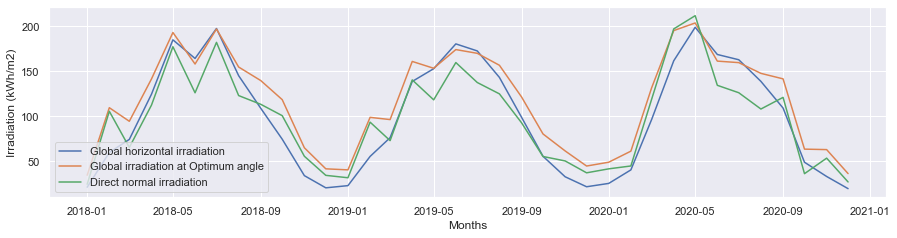

In [47]:
sns.set_theme(style="darkgrid")

plt.rcParams["figure.figsize"] = [15, 3.50]

fig, ax = plt.subplots()
ax1 = sns.lineplot(x='date', y='global_horizontal_irradiation', data=brussels_df, label='Global horizontal irradiation')
ax2 = sns.lineplot(x='date', y='global_irradiation_optimum_angle', data=brussels_df, label='Global irradiation at Optimum angle')
ax3 = sns.lineplot(x='date', y='direct_normal_irradiation', data=brussels_df, label='Direct normal irradiation')
ax.set(xlabel='Months', ylabel='Irradiation (kWh/m2)')
plt.legend(loc='lower left')

# Generating Water Consumption. Unit: litres of DHWD/day at 60ºC
## Reference: Spanish Technical Building Code (CTE)

### The litres of DHWD/day at 60ºC in the table have been calculated from Table 1 (average daily unit consumption) of UNE 94002:2005 “Thermal solar systems for domestic hot water production: Calculation method for heat demand.” Equation (3.2) was used for the calculation, with Ti = 12ºC (constant) and T = 45ºC.

In [48]:
water_consumption_per_person = {'single_family_dwellings' : 30,
                                'multi_family_dwellings' : 22,
                                'hospitals_and_clinics' : 55,
                                '4_star_hotel' : 70,
                                '3_star_hotel' : 55,
                                '2_star_hotel' : 40,
                                'hostel' : 40,
                                'camping' : 40,
                                'boarding_house' : 35,
                                'homes_for_the_elderly' : 55,
                                'student_dormitories' : 55,
                                'dressing_rooms' : 15,
                                'schools' : 3,
                                'barracks' : 20,
                                'factories_and_shops' : 15,
                                'administrative_premises' : 3,
                                'gyms' : 22.5,
                                'restaurants' : 7.5,
                                'cafeterias' : 1
                               }

In [49]:
data = [('library', 'schools', 1, 30),
        ('office', 'administrative_premises', 4, 4)]
b1_df = pd.DataFrame(data,
                     columns=['room_name', 'room_type', 'room_count', 'people_count'],
                    )
# b1_df.set_index('room_name',
#                 inplace = True
#                )
b1_df

,room_name,room_type,room_count,people_count
0,library,schools,1,30
1,office,administrative_premises,4,4


In [50]:
b1_dict = b1_df.to_dict(orient='records')
b1_dict

[{'room_name': 'library',
  'room_type': 'schools',
  'room_count': 1,
  'people_count': 30},
 {'room_name': 'office',
  'room_type': 'administrative_premises',
  'room_count': 4,
  'people_count': 4}]

In [51]:
class Room:
    def __init__(self, room_name, room_type, room_count, people_count):
        self.room_name = room_name
        self.room_type = room_type
        self.room_count = room_count
        self.people_count = people_count

In [52]:
def getWater(room_type, room_count, people_count):
    if room_type in water_consumption_per_person.keys():
        water_consumption = water_consumption_per_person[room_type] * room_count * people_count            
    else:
        print('Please choose from building types from CTE')
        water_consumption = 0
    return water_consumption

In [53]:
room_list = [Room(**x) for x in b1_dict]
b1_water = 0
for room in room_list:
    b1_water += getWater(room.room_type, room.room_count, room.people_count)
b1_water

138

In [54]:
data = [('library', 'schools', 1, 38),
        ('dining_room', 'restaurants', 1, 38)]
b2_df = pd.DataFrame(data,
                     columns=['room_name', 'room_type', 'room_count', 'people_count'],
                    )
b2_df

,room_name,room_type,room_count,people_count
0,library,schools,1,38
1,dining_room,restaurants,1,38


In [55]:
b2_dict = b2_df.to_dict(orient='records')
b2_dict

[{'room_name': 'library',
  'room_type': 'schools',
  'room_count': 1,
  'people_count': 38},
 {'room_name': 'dining_room',
  'room_type': 'restaurants',
  'room_count': 1,
  'people_count': 38}]

In [56]:
room_list = [Room(**x) for x in b2_dict]
b2_water = 0
for room in room_list:
    b2_water += getWater(room.room_type, room.room_count, room.people_count)
b2_water

399.0

In [57]:
data = [('gym', 'gyms', 1, 10),
        ('fronton', 'gyms', 1, 25)]
b3_df = pd.DataFrame(data,
                     columns=['room_name', 'room_type', 'room_count', 'people_count'],
                    )
b3_df

,room_name,room_type,room_count,people_count
0,gym,gyms,1,10
1,fronton,gyms,1,25


In [58]:
b3_dict = b3_df.to_dict(orient='records')
b3_dict

[{'room_name': 'gym',
  'room_type': 'gyms',
  'room_count': 1,
  'people_count': 10},
 {'room_name': 'fronton',
  'room_type': 'gyms',
  'room_count': 1,
  'people_count': 25}]

In [59]:
room_list = [Room(**x) for x in b3_dict]
b3_water = 0
for room in room_list:
    b3_water += getWater(room.room_type, room.room_count, room.people_count)
b3_water

787.5

In [60]:
data = [('dwellings', 'single_family_dwellings', 4, 4),
        ('restaurant', 'restaurants', 1, 20), 
        ('hostel', 'hostel', 1, 15)]
b4_df = pd.DataFrame(data,
                     columns=['room_name', 'room_type', 'room_count', 'people_count'],
                    )
b4_df

,room_name,room_type,room_count,people_count
0,dwellings,single_family_dwellings,4,4
1,restaurant,restaurants,1,20
2,hostel,hostel,1,15


In [61]:
b4_dict = b4_df.to_dict(orient='records')
b4_dict

[{'room_name': 'dwellings',
  'room_type': 'single_family_dwellings',
  'room_count': 4,
  'people_count': 4},
 {'room_name': 'restaurant',
  'room_type': 'restaurants',
  'room_count': 1,
  'people_count': 20},
 {'room_name': 'hostel',
  'room_type': 'hostel',
  'room_count': 1,
  'people_count': 15}]

In [62]:
room_list = [Room(**x) for x in b4_dict]
b4_water = 0
for room in room_list:
    b4_water += getWater(room.room_type, room.room_count, room.people_count)
b4_water

1230.0

In [63]:
#Total water consumption for four (4) buildings in the disctrict
total_water = b1_water + b2_water + b3_water + b4_water
total_water

2554.5

In [64]:
c = 4186       #specific heat of water at J/kg-K
hwt = 60        #hot water temperature requirement at degC

#calculating demand in Joules, Q = m*c*deltaT*no.days

demand = pd.DataFrame()
demand['calendar_days'] = brussels_df['calendar_days'][0:12]
demand['mwt'] = [9,10,10,11,13,15,17,17,16,14,11,10]
demand['b1'] = b1_water*c*(hwt - demand['mwt'])*demand['calendar_days']
demand['b2'] = b2_water*c*(hwt - demand['mwt'])*demand['calendar_days']
demand['b3'] = b3_water*c*(hwt - demand['mwt'])*demand['calendar_days']
demand['b4'] = b4_water*c*(hwt - demand['mwt'])*demand['calendar_days']
demand['total'] = demand['b1'] + demand['b2'] + demand['b3'] + demand['b4']
demand

,calendar_days,mwt,b1,b2,b3,b4,total
0,31.0,9,913293108.0,2.640608e+09,5.211727e+09,8.140221e+09,1.690585e+10
1,28.0,10,808735200.0,2.338300e+09,4.615065e+09,7.208292e+09,1.497039e+10
2,31.0,10,895385400.0,2.588832e+09,5.109536e+09,7.980609e+09,1.657436e+10
3,30.0,11,849171960.0,2.455215e+09,4.845818e+09,7.568707e+09,1.571891e+10
4,31.0,13,841662276.0,2.433502e+09,4.802964e+09,7.501772e+09,1.557990e+10
5,30.0,15,779851800.0,2.254789e+09,4.450241e+09,6.950853e+09,1.443573e+10
6,31.0,17,770031444.0,2.226395e+09,4.394201e+09,6.863324e+09,1.425395e+10
7,31.0,17,770031444.0,2.226395e+09,4.394201e+09,6.863324e+09,1.425395e+10
8,30.0,16,762521760.0,2.204682e+09,4.351347e+09,6.796390e+09,1.411494e+10
9,31.0,14,823754568.0,2.381725e+09,4.700773e+09,7.342160e+09,1.524841e+10


# Calculation of Solar Thermal Area based on available solar thermal brands

In [65]:
data = [('AP-30', 2.005, 2.195, 2.83, 0.687, 1.505, 0.0111),
        ('Promatop 1.5', 1.51, 1.01, 1.34, 0.76, 4.54, 0.012), 
        ('Promatop 2.6', 2.005, 2.196, 2.83, 0.687, 1.505, 0.0111)
#additional brands can be added here   
       ]

solar_df = pd.DataFrame(data,
                     columns=['model', 'length', 'width', 'aperture_area', 'tau_alpha', 'k1', 'k2',],
                    )
solar_df

,model,length,width,aperture_area,tau_alpha,k1,k2
0,AP-30,2.005,2.195,2.83,0.687,1.505,0.0111
1,Promatop 1.5,1.510,1.010,1.34,0.760,4.540,0.0120
2,Promatop 2.6,2.005,2.196,2.83,0.687,1.505,0.0111


In [66]:
solar_dict = solar_df.to_dict(orient='records')
solar_dict

[{'model': 'AP-30',
  'length': 2.005,
  'width': 2.195,
  'aperture_area': 2.83,
  'tau_alpha': 0.687,
  'k1': 1.505,
  'k2': 0.0111},
 {'model': 'Promatop 1.5',
  'length': 1.51,
  'width': 1.01,
  'aperture_area': 1.34,
  'tau_alpha': 0.76,
  'k1': 4.54,
  'k2': 0.012},
 {'model': 'Promatop 2.6',
  'length': 2.005,
  'width': 2.196,
  'aperture_area': 2.83,
  'tau_alpha': 0.687,
  'k1': 1.505,
  'k2': 0.0111}]

In [67]:
solar_dict[0]['model']

'AP-30'

In [68]:
import math

#latitude - latitude of the palce
#declination at worst day = -23.45 degrees
#solar altitude at noon = 23.284 degrees

#col_hor = horizontal dimension (size) of the collector

def distancing(slope_collector, slope_roof, col_hor):
    #conversion to radians
#    declination = -23.45 * math.pi / 180
    altitude = 23.284 * math.pi / 180
#    if -90 <= lat <= 90: 
#        lat = lat * math.pi / 180
    if 0 <= slope_collector <= 90: 
        slope_collector = slope_collector * math.pi / 180
    if 0 <= slope_roof <= 90:
        slope_roof = slope_roof * math.pi / 180

    #security factor, s 
    if slope_collector == slope_roof:
        s = 1
    else:
        s = 1.25
        
    d1 = col_hor * math.sin(slope_collector - slope_roof) / math.tan(altitude + slope_roof)
    d2 = col_hor * math.cos(slope_collector - slope_roof)
    d = s * (d1 + d2)

    return d
    

In [69]:
distancing(45, 35, 2.196)

2.9978750371689995

In [84]:

#roof_hor = horizontal dimension (size) of the roof
#roof_ver = vertical dimension (size) of the roof
#col_hor = horizontal dimension (size) of the collector
#col_hor = vertical dimension (size) of the collector
irradiance_area = 0

def no_collector(roof_hor, roof_ver, col_hor, col_ver):
    roof_area = roof_hor * roof_ver
    col_area = col_hor * col_ver
    
    columns = roof_hor // col_ver
    rows = roof_ver // col_hor
    total_no = columns * rows
    global irradiance_area
    irradiance_area = total_no * col_area
    
    return print(f'The total number of solar panels is {total_no}.'), print(f'The total solar panel area is {irradiance_area} m2.')
    

In [85]:
no_collector(17, 6, 2.196, 2.005)

The total number of solar panels is 16.0.
The total solar panel area is 70.44768 m2.


(None, None)

# Start Calculation

In [72]:
# Choose the the year for consideration
year = 2019
calcdf = brussels_df[brussels_df['year'] == year]
calcdf.reset_index(inplace=True)
calcdf

,index,year,month,global_horizontal_irradiation,global_irradiation_optimum_angle,direct_normal_irradiation,diffuse_global_ratio,outdoor_temperature,date,calendar_days,business_days
0,12,2019,1,23.13,40.64,31.89,0.68,2.7,2019-01-01,31.0,23
1,13,2019,2,55.56,98.94,93.63,0.41,6.2,2019-02-01,28.0,20
2,14,2019,3,76.37,96.48,73.11,0.56,8.2,2019-03-01,31.0,21
3,15,2019,4,138.83,161.04,140.54,0.43,10.3,2019-04-01,30.0,22
4,16,2019,5,152.97,153.44,118.39,0.52,12.0,2019-05-01,31.0,23
5,17,2019,6,180.53,174.20,159.82,0.44,18.5,2019-06-01,30.0,20
6,18,2019,7,172.71,170.06,137.65,0.50,19.5,2019-07-01,31.0,23
7,19,2019,8,143.30,156.78,125.03,0.50,19.1,2019-08-01,31.0,22
8,20,2019,9,99.03,121.58,92.92,0.54,15.5,2019-09-01,30.0,21
9,21,2019,10,55.73,80.53,55.50,0.64,12.3,2019-10-01,31.0,23


In [73]:
calcdf = calcdf[['year', 'month', 'global_horizontal_irradiation',
#       'global_irradiation_optimum_angle', 'direct_normal_irradiation',
#       'diffuse_global_ratio', 
                'outdoor_temperature', 'date', 'calendar_days',
                'business_days'
               ]].copy()


In [74]:
#conversion from kWh/m2/mo to J/m2/day : 1kWh(1000Wh/1kWh)(3600s/1h) = 3600000 J

calcdf['H'] = (calcdf['global_horizontal_irradiation']/calcdf['calendar_days'])*3600000     #units in J/m2/day
calcdf['L'] = demand['total']               #units in J
calcdf

,year,month,global_horizontal_irradiation,outdoor_temperature,date,calendar_days,business_days,H,L
0,2019,1,23.13,2.7,2019-01-01,31.0,23,2.686065e+06,1.690585e+10
1,2019,2,55.56,6.2,2019-02-01,28.0,20,7.143429e+06,1.497039e+10
2,2019,3,76.37,8.2,2019-03-01,31.0,21,8.868774e+06,1.657436e+10
3,2019,4,138.83,10.3,2019-04-01,30.0,22,1.665960e+07,1.571891e+10
4,2019,5,152.97,12.0,2019-05-01,31.0,23,1.776426e+07,1.557990e+10
5,2019,6,180.53,18.5,2019-06-01,30.0,20,2.166360e+07,1.443573e+10
6,2019,7,172.71,19.5,2019-07-01,31.0,23,2.005665e+07,1.425395e+10
7,2019,8,143.30,19.1,2019-08-01,31.0,22,1.664129e+07,1.425395e+10
8,2019,9,99.03,15.5,2019-09-01,30.0,21,1.188360e+07,1.411494e+10
9,2019,10,55.73,12.3,2019-10-01,31.0,23,6.471871e+06,1.524841e+10


In [101]:
fr = 0.94      #heat removal factor
model = 0       #from solar_df
tref = 100      #reference temperature at 100 degC
storage = 75        #solar water storage
thot = 60           #required hot water

calcdf['mwt'] = demand['mwt']

# Calculate X
calcdf['X'] = irradiance_area*fr*solar_df.loc[model, 'k1']*(tref - calcdf['outdoor_temperature'])*calcdf['calendar_days']*24*3600/calcdf['L']
calcdf["X'"] = calcdf['X']*(11.6 + 1.18*thot + 3.86*calcdf['mwt'] - 2.32*calcdf['outdoor_temperature'])/(100 - calcdf['outdoor_temperature'])

#calculate Y
calcdf['Y'] = irradiance_area*fr*solar_df.loc[model, 'tau_alpha']*calcdf['H']*calcdf['calendar_days']/calcdf['L']


calcdf['f'] = 1.029*calcdf['Y'] - 0.065*calcdf["X'"] - 0.245*(calcdf['Y']**2) + 0.0018*calcdf["X'"]  + 0.0215*(calcdf['Y']**3)

calcdf



,year,month,global_horizontal_irradiation,outdoor_temperature,date,calendar_days,business_days,H,L,X,mwt,Y,X',f
0,2019,1,23.13,2.7,2019-01-01,31.0,23,2.686065e+06,1.690585e+10,1.536322,9,0.224074,1.750681,0.107870
1,2019,2,55.56,6.2,2019-02-01,28.0,20,7.143429e+06,1.497039e+10,1.510680,10,0.607831,1.717086,0.431249
2,2019,3,76.37,8.2,2019-03-01,31.0,21,8.868774e+06,1.657436e+10,1.478469,10,0.754640,1.642357,0.542444
3,2019,4,138.83,10.3,2019-04-01,30.0,22,1.665960e+07,1.571891e+10,1.474131,11,1.446487,1.659244,0.936022
4,2019,5,152.97,12.0,2019-05-01,31.0,23,1.776426e+07,1.557990e+10,1.507733,13,1.608035,1.794545,0.997135
5,2019,6,180.53,18.5,2019-06-01,30.0,20,2.166360e+07,1.443573e+10,1.458427,15,2.048162,1.742597,1.154387
6,2019,7,172.71,19.5,2019-07-01,31.0,23,2.005665e+07,1.425395e+10,1.507534,17,1.984431,1.924774,1.123546
7,2019,8,143.30,19.1,2019-08-01,31.0,22,1.664129e+07,1.425395e+10,1.515025,17,1.646511,1.942153,1.003291
8,2019,9,99.03,15.5,2019-09-01,30.0,21,1.188360e+07,1.411494e+10,1.546478,16,1.149057,1.980224,0.766367
9,2019,10,55.73,12.3,2019-10-01,31.0,23,6.471871e+06,1.524841e+10,1.535258,14,0.598574,1.888945,0.413381


[Text(0.5, 0, 'Months'), Text(0, 0.5, 'Solar Fraction')]

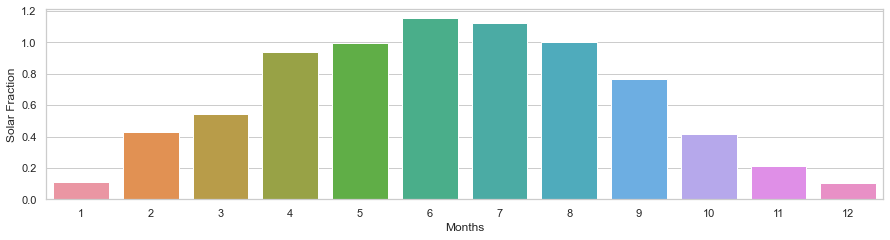

In [109]:
sns.set_theme(style='whitegrid')
ax = sns.barplot(x='month', y='f', data=calcdf)
ax.set(xlabel='Months', ylabel='Solar Fraction')